OBS.:

passar p inteiro colunas qtd_fotos e tam_desc

arredondar avaliacao

normalizar dados

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv("dados_v1.csv")
data = data.drop('Unnamed: 0', 1)
data

,id_produto,regiao,frete,tempo_entrega,qtd_vendida,avaliacao,qtd_fotos,tam_desc,categoria
0,1e9e8ef04dbcff4541ed26657ea517e5,Sul,NaN,NaN,1,5.00000,1.0,287.0,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,Sul,NaN,NaN,1,5.00000,1.0,276.0,artes
2,96bd76ec8810374ed1b65e291975717f,Sul,NaN,NaN,1,5.00000,1.0,250.0,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,Sul,NaN,NaN,1,1.00000,1.0,261.0,bebes
4,9dc1a7de274444849c219cff195d0b71,Sul,NaN,NaN,1,5.00000,4.0,402.0,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...
164750,a0b7d5a992ccda646f2d34e418fff5a0,Centro-Oeste,NaN,NaN,33,3.22363,2.0,67.0,moveis_decoracao
164751,bf4538d88321d0fd4412a93c974510e6,Centro-Oeste,NaN,NaN,2,4.50000,1.0,971.0,construcao_ferramentas_iluminacao
164752,9a7c6041fa9592d9d9ef6cfe62a71f8c,Centro-Oeste,NaN,NaN,5,4.43750,1.0,799.0,cama_mesa_banho
164753,83808703fc0706a22e264b9d75f04a2e,Centro-Oeste,NaN,NaN,7,4.96875,2.0,156.0,informatica_acessorios


In [3]:
data.iloc[:,5:8] 

,avaliacao,qtd_fotos,tam_desc
0,5.00000,1.0,287.0
1,5.00000,1.0,276.0
2,5.00000,1.0,250.0
3,1.00000,1.0,261.0
4,5.00000,4.0,402.0
...,...,...,...
164750,3.22363,2.0,67.0
164751,4.50000,1.0,971.0
164752,4.43750,1.0,799.0
164753,4.96875,2.0,156.0


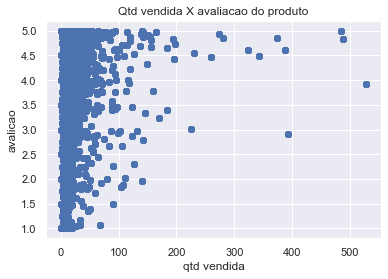

In [9]:
# Relação entre qnd vendida e avaliacao
plt.scatter(data['qtd_vendida'],data['avaliacao'])
plt.title('Quantidade vendida X avaliacao do produto')
plt.xlabel('qtd vendida')
plt.ylabel('avalicao')
plt.show()

In [16]:
df_products = pd.read_csv("Data\olist_products_dataset.csv")

total_pedidos = len(df_products)
total_pedidos
data_products = data.iloc[:total_pedidos,4:8]
data_products # contem apenas dados referentes a produtos

,qtd_vendida,avaliacao,qtd_fotos,tam_desc
0,1,5.00000,1.0,287.0
1,1,5.00000,1.0,276.0
2,1,5.00000,1.0,250.0
3,1,1.00000,1.0,261.0
4,1,5.00000,4.0,402.0
...,...,...,...,...
32946,33,3.22363,2.0,67.0
32947,2,4.50000,1.0,971.0
32948,5,4.43750,1.0,799.0
32949,7,4.96875,2.0,156.0


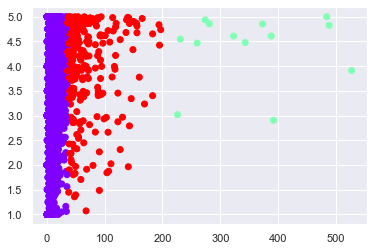

In [27]:
# cluster p avaliacao e qtd vendida
x = data_products.iloc[:, :2]
kmeans = KMeans(3)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

data_products_aval_qtd = data_products.copy()
data_products_aval_qtd['Clusters'] = identified_clusters 
plt.scatter(data_products_aval_qtd['qtd_vendida'],data_products_aval_qtd['avaliacao'],c=data_products_aval_qtd['Clusters'],cmap='rainbow')